## EXPLORACIÓN DE DATOS(EDA)

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sb
import numpy as np
from scipy import stats



print(os.listdir("/Users/geraldine/Documents/IDS/DATASET/dataone"))

['.DS_Store', 'new_data_test.csv', 'new_data_train.csv']


In [4]:
train=pd.read_csv("/Users/geraldine/Documents/IDS/DATASET/dataone/new_data_train.csv")
train.head()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,1501132,0,icmp,ecr_i,SF,1032,0,0,0,0,...,255,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
1,2595239,0,icmp,ecr_i,SF,1032,0,0,0,0,...,255,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
2,595866,0,tcp,private,S0,0,0,0,0,0,...,4,0.02,0.1,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
3,2718540,0,icmp,ecr_i,SF,1032,0,0,0,0,...,255,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
4,493936,0,icmp,ecr_i,SF,1032,0,0,0,0,...,255,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.


In [5]:
test=pd.read_csv("/Users/geraldine/Documents/IDS/DATASET/dataone/new_data_test.csv")
test.head()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,1647771,0,icmp,ecr_i,SF,1032,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
1,3370477,0,icmp,ecr_i,SF,1032,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
2,3533072,0,tcp,private,S0,0,0,0,0,0,...,11,0.04,0.08,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
3,641600,0,tcp,private,S0,0,0,0,0,0,...,13,0.05,0.06,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
4,4169133,0,icmp,ecr_i,SF,520,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.


Validamos que se hayan creado con la cantidad de columnas correspondientes a la carga y divison de datos

In [6]:
train.shape

(3428901, 43)

Vemos que se nos genero una columna extra 'Unnamed: 0' en nuestro dataset, así que procedemos a eliminar

In [7]:
del(train['Unnamed: 0'])

In [8]:
del(test['Unnamed: 0'])

In [9]:
train.shape

(3428901, 42)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3428901 entries, 0 to 3428900
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells                   int64  
 18  num_access_files             int64  
 19  

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469529 entries, 0 to 1469528
Data columns (total 42 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   duration                     1469529 non-null  int64  
 1   protocol_type                1469529 non-null  object 
 2   service                      1469529 non-null  object 
 3   flag                         1469529 non-null  object 
 4   src_bytes                    1469529 non-null  int64  
 5   dst_bytes                    1469529 non-null  int64  
 6   land                         1469529 non-null  int64  
 7   wrong_fragment               1469529 non-null  int64  
 8   urgent                       1469529 non-null  int64  
 9   hot                          1469529 non-null  int64  
 10  num_failed_logins            1469529 non-null  int64  
 11  logged_in                    1469529 non-null  int64  
 12  num_compromised              1469529 non-n

In [12]:
#conteo de cantidad de tipo de datos del data set
print("cantidad de tipo de datos del train")
train.dtypes.value_counts()

cantidad de tipo de datos del train


int64      23
float64    15
object      4
dtype: int64

In [14]:
#conteo de cantidad de tipo de datos del data set
print("cantidad de tipo de datos del test")
test.dtypes.value_counts()

cantidad de tipo de datos del test


int64      23
float64    15
object      4
dtype: int64

Encontramos que tenemos, 42 columnas de las cuales: 15 datos son de tipo float, 23 son de tipo entero, y 4 son de tipo categorico u object

In [15]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,...,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06
mean,4.819509e+01,1.806293e+03,1.274987e+03,6.124411e-06,6.658110e-04,1.049899e-05,1.244422e-02,3.383008e-05,1.435092e-01,8.935808e-03,...,2.329609e+02,1.892407e+02,7.538705e-01,3.067457e-02,6.052215e-01,6.479566e-03,1.779923e-01,1.777848e-01,5.792699e-02,5.765299e-02
std,7.252256e+02,8.425637e+05,7.708454e+05,2.474748e-03,4.343675e-02,8.572797e-03,4.711797e-01,7.825790e-03,3.505915e-01,4.489245e+00,...,6.405630e+01,1.058930e+02,4.110865e-01,1.084207e-01,4.809424e-01,4.138206e-02,3.817564e-01,3.820926e-01,2.309504e-01,2.309709e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,5.000000e+01,4.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.832900e+04,1.167519e+09,1.309937e+09,1.000000e+00,3.000000e+00,1.400000e+01,7.700000e+01,5.000000e+00,1.000000e+00,7.479000e+03,...,2.550000e+02,2.550000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Tenemos en la primera fila un conteo de la cantidad de datos que hay por cada variables, en la segunda podemos ver la media, desviación estandar, el valor minimo, el percentil 25, 50 y 75, y el valor maximo.

In [16]:
train.keys()

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'outcome'],
      dtype='object')

Tenemos los atributos anteriores que son usados para identificar los ataques

## Limpieza de Datos

In [17]:
#Observando si existen valores nulos o perdidos
train.isnull().any().any()

False

De lo anterior podemos ver que no tenemos valores perdidos o nulos

In [18]:
# Agrupando columnas por tipos
data_type = train.columns.to_series().groupby(train.dtypes).groups
data_type

{dtype('int64'): Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
        'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
        'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
        'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
        'is_guest_login', 'count', 'srv_count', 'dst_host_count',
        'dst_host_srv_count'],
       dtype='object'),
 dtype('float64'): Index(['serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
        'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
        'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
        'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
        'dst_host_serror_rate', 'dst_host_srv_serror_rate',
        'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
       dtype='object'),
 dtype('O'): Index(['protocol_type', 'service', 'flag', 'outcome'], dtype='object')}

In [19]:
# Creando columnas categoricas
colums_cat = data_type[np.dtype('object')]
len(colums_cat)

4

Se tienen 4 columnas categoricas de 42 columnas

In [20]:
# Entradas categoricas 
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

protocol_type     3
service          69
flag             11
outcome          23
dtype: int64

De lo anterior tenemos que protocol_type,service,flag y outcome son variables categoricas. Ademas tenemos que protocol_type tiene 3 valores unicos o categorias, services 68, flag 11 y otucome 23 valores unicos.

Vamos a usar el unique para ver los diferentes valores unicos que tenemos de los categoricos anteriores

In [21]:
train.service.unique()

array(['ecr_i', 'private', 'other', 'http', 'netbios_ssn', 'smtp',
       'ftp_data', 'domain_u', 'urp_i', 'Z39_50', 'eco_i', 'uucp',
       'shell', 'domain', 'daytime', 'nntp', 'sql_net', 'finger',
       'http_443', 'systat', 'ftp', 'remote_job', 'ntp_u', 'ldap',
       'printer', 'netbios_ns', 'time', 'telnet', 'pop_2', 'gopher',
       'auth', 'IRC', 'efs', 'exec', 'link', 'hostnames', 'netbios_dgm',
       'iso_tsap', 'discard', 'login', 'nnsp', 'ssh', 'csnet_ns', 'rje',
       'echo', 'netstat', 'whois', 'imap4', 'vmnet', 'klogin', 'courier',
       'pop_3', 'ctf', 'mtp', 'uucp_path', 'sunrpc', 'bgp', 'name',
       'supdup', 'kshell', 'urh_i', 'X11', 'red_i', 'pm_dump', 'aol',
       'tftp_u', 'http_8001', 'tim_i', 'harvest'], dtype=object)

De lo anterior tenemos diferentes tipos de servios, entre esos http

In [22]:
#Conteo del conjunto de datos
len(train['service'].unique())

69

De los diferentes tipos de servicios encontramos que hay 68 tipos

In [23]:
train.protocol_type.unique()

array(['icmp', 'tcp', 'udp'], dtype=object)

In [24]:
#Conteo del conjunto de datos
len(train['protocol_type'].unique())

3

De protocol_type encontramos que hay 3 tipos que son: icmp, tcp y udp

In [25]:
train.flag.unique()

array(['SF', 'S0', 'REJ', 'RSTO', 'RSTR', 'SH', 'S1', 'RSTOS0', 'OTH',
       'S2', 'S3'], dtype=object)

In [26]:
#Conteo del conjunto de datos
len(train['flag'].unique())

11

Del campo de flag vemos que nos muestra 11 tipos de un estado de una conexión, como si es un estado normal ó un error

In [27]:
# Conteo del conjuto de datos de ataques
train.outcome.unique()

array(['smurf.', 'neptune.', 'normal.', 'satan.', 'portsweep.',
       'ipsweep.', 'nmap.', 'warezclient.', 'pod.', 'teardrop.', 'back.',
       'guess_passwd.', 'loadmodule.', 'buffer_overflow.', 'imap.',
       'ftp_write.', 'warezmaster.', 'land.', 'spy.', 'multihop.',
       'rootkit.', 'perl.', 'phf.'], dtype=object)

In [28]:
#Conteo del conjunto de datos
len(train['outcome'].unique())

23

De outcome vemos que existen 23 tipos de ataque, este campo es importante porque nos enseña los tipos de ataques que hubieron. 

In [29]:
# Creando columnas numericas
#lista de columnas
columnas = train.columns  
colums_num = list(set(columnas) - set(colums_cat))
len(colums_num)

38

Encontramos que se tienen 38 columnas numericas de 42 

In [30]:
len(train['outcome'])

3428901

In [31]:
train['outcome'].value_counts()

smurf.              1966044
neptune.             750118
normal.              680687
satan.                11012
ipsweep.               8847
portsweep.             7309
nmap.                  1627
back.                  1522
warezclient.            721
teardrop.               703
pod.                    189
guess_passwd.            35
buffer_overflow.         20
land.                    15
warezmaster.             11
imap.                    10
ftp_write.                8
loadmodule.               7
multihop.                 5
rootkit.                  5
phf.                      3
perl.                     2
spy.                      1
Name: outcome, dtype: int64

De lo anterior vemos la cantidad de datos por cada tipo de ataque. Vemos que el menor tipo de ataque es spy con 1 y el mayor es smurf con 1964900

# Tabla de Contingencia

In [32]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [36]:
# tabla de contingencia en porcentajes relativos

pd.crosstab(index=train['outcome'], columns=train['service'] ).apply(lambda r: r/r.sum() *100, axis=0)

service,IRC,X11,Z39_50,aol,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,harvest,hostnames,http,http_443,http_8001,imap4,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois
outcome,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
back.,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.349053,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
buffer_overflow.,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027701,0.020975,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.446582,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
ftp_write.,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055402,0.013983,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.276625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
guess_passwd.,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.202336,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
imap.,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,1.366120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
ipsweep.,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.038961,0.000000,0.000000,1.273885,0.000000,0.000000,70.859029,0.001625,0.000000,0.000000,0.166563,0.249307,0.034958,0.935829,0.0,0.00000,0.002064,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.094391,0.000000,1.472557,1.059603,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.065038,0.0,1.198402,1.192053,0.000000,0.011822,0.000000,1.321004,0.000000,0.000000,0.000000,0.343525,0.0,0.0,0.897666,0.

Se presenta los porcentajes relativos más altos en tipos de ataque respecto al campo service más usado. Se tiene que para el tipo de ataque neptune 98.63% en el service Z39_50, 30.33% en el service auth, 99.16% en el service bgp, 98.89% en el service courier,98.53% en el service csnet_ns, 96.98% en el service ctf, 97.89% en el service daytime,45.55% en el service telnet, 65.25% en el service time. 
El tipo de ataque normal con respecto al service maneja porcentajes altos con el service IRC de 100%, 94.44% X11, 69% con el service auth, 44.55% con el service telnet.


In [40]:
# tabla de contingencia en porcentajes relativos
pd.crosstab(index=train['outcome'], columns=train['protocol_type'] ).apply(lambda r: r/r.sum() *100, axis=0)

protocol_type,icmp,tcp,udp
outcome,,,
back.,0.000000,0.116273,0.000000
buffer_overflow.,0.000000,0.001528,0.000000
ftp_write.,0.000000,0.000611,0.000000
guess_passwd.,0.000000,0.002674,0.000000
imap.,0.000000,0.000764,0.000000
ipsweep.,0.412776,0.050191,0.000000
land.,0.000000,0.001146,0.000000
loadmodule.,0.000000,0.000535,0.000000
multihop.,0.000000,0.000382,0.000000


Se presenta los porcentajes relativos más altos en tipos de ataque respecto al tipo de protocolos más usado. Se tiene que un 99.09% del tipo de ataque smurf uso el tipo de protocolo icmp,un 41.07%  normal uso el tipo de protocolo tcp, y un 98.50% del tipo de protocolo udp, el tipo de ataque neptune presento un 57.31% del tipo de protocolo tcp. 

In [51]:
# tabla de contingencia en porcentajes relativos
pd.crosstab(index=train['protocol_type'], columns=train['outcome'] ).apply(lambda r: r/r.sum() *100, axis=0)

outcome,back.,buffer_overflow.,ftp_write.,guess_passwd.,imap.,ipsweep.,land.,loadmodule.,multihop.,neptune.,nmap.,normal.,perl.,phf.,pod.,portsweep.,rootkit.,satan.,smurf.,spy.,teardrop.,warezclient.,warezmaster.
protocol_type,,,,,,,,,,,,,,,,,,,,,,,
icmp,0.0,0.0,0.0,0.0,0.0,92.689655,0.0,0.0,0.0,0.0,46.460980,1.310384,0.0,0.0,100.0,0.054392,0.000000,0.225917,100.0,0.0,0.0,0.0,0.0
tcp,100.0,100.0,100.0,100.0,100.0,7.310345,100.0,100.0,100.0,100.0,43.678161,79.113210,100.0,100.0,0.0,99.945608,57.142857,89.083680,0.0,100.0,0.0,100.0,100.0
udp,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,9.860859,19.576406,0.0,0.0,0.0,0.000000,42.857143,10.690403,0.0,0.0,100.0,0.0,0.0


In [52]:
# tabla de contingencia en porcentajes relativos
pd.crosstab(index=train['outcome'], columns=train['flag'] ).apply(lambda r: r/r.sum() *100, axis=0)

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
outcome,,,,,,,,,,,
back.,0.000000,0.000000,0.000000,0.0,0.995459,0.000000,0.256410,3.90625,0.000000,0.057191,0.000000
buffer_overflow.,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000839,0.000000
ftp_write.,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000191,0.000000
guess_passwd.,0.000000,0.000000,0.740741,0.0,0.052393,0.000000,0.000000,0.00000,3.571429,0.000076,0.000000
imap.,0.000000,0.000000,0.000000,0.0,0.000000,0.000164,0.256410,0.00000,0.000000,0.000114,0.549451
ipsweep.,0.000000,0.299221,0.767196,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.309380,0.000000
land.,0.000000,0.000000,0.000000,0.0,0.000000,0.002134,0.000000,0.00000,0.000000,0.000000,0.000000
loadmodule.,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000267,0.000000
multihop.,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000153,0.000000


# Distribuccion del conjunto de datos Train y Test

In [54]:
print('Label distribution Training set:')
print(train['outcome'].value_counts())
print("=============================")

Label distribution Training set:
smurf.              1964900
neptune.             750184
normal.              681785
satan.                11066
ipsweep.               8700
portsweep.             7354
nmap.                  1653
back.                  1562
warezclient.            713
teardrop.               683
pod.                    176
guess_passwd.            34
buffer_overflow.         22
warezmaster.             15
land.                    13
imap.                     9
loadmodule.               7
rootkit.                  7
ftp_write.                5
phf.                      4
multihop.                 4
perl.                     3
spy.                      2
Name: outcome, dtype: int64


<Figure size 432x288 with 0 Axes>

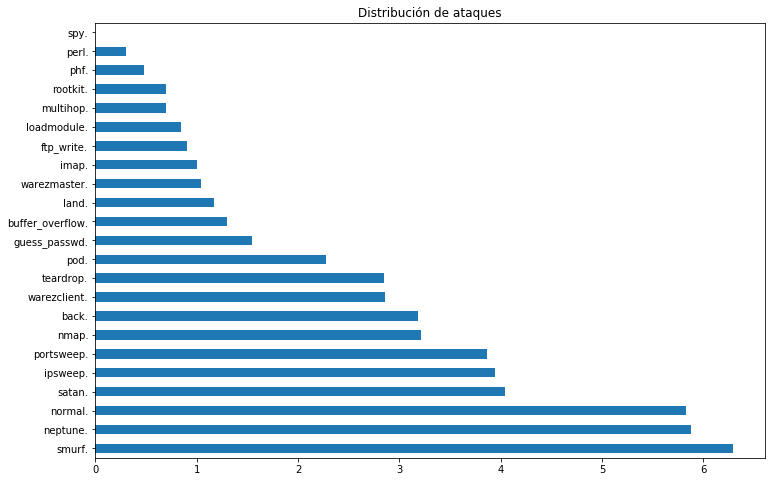

In [43]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.clf()
plt.figure(figsize=(12,8))
plt.title('Distribución de ataques')
train['outcome'].value_counts().apply(np.log10).plot(kind='barh')
plt.show()

De lo anterior tenemos una distribución de frecuencia que nos permite ver tipos de ataques, en donde vemos que smurf es el tipo de ataque más usado, y el perl menos usado. Podemos observar que hay datos desbalanceados, en donde realizamos la frecuencia en potencias de 10.

In [56]:
# Desbalanceo de datos
train.groupby('outcome').size()

outcome
back.                  1562
buffer_overflow.         22
ftp_write.                5
guess_passwd.            34
imap.                     9
ipsweep.               8700
land.                    13
loadmodule.               7
multihop.                 4
neptune.             750184
nmap.                  1653
normal.              681785
perl.                     3
phf.                      4
pod.                    176
portsweep.             7354
rootkit.                  7
satan.                11066
smurf.              1964900
spy.                      2
teardrop.               683
warezclient.            713
warezmaster.             15
dtype: int64

De lo anterior vemos que tenemos un desbalanceo en nuestros datos.

# Correlacion de datos

In [57]:
corr_ = train.corr()
corr_

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.039358,0.016506,-0.000157,-0.001003,0.004713,0.003545,0.008808,-0.020673,0.020478,0.021215,0.046803,0.021712,0.093980,-0.000447,0.020845,NaN,-0.000025,0.002719,-0.104611,-0.079526,-0.031020,-0.031009,0.017583,0.017813,0.021822,0.049271,-0.012752,0.010913,-0.116952,-0.118713,0.407954,0.042834,-0.008803,-0.030522,-0.030531,0.011679,0.016995
src_bytes,0.039358,1.000000,0.000255,-0.000004,-0.000026,-0.000002,0.000818,-0.000006,0.000115,0.000004,-0.000004,-0.000004,-0.000002,0.000032,0.000018,-0.000023,NaN,-0.000001,-0.000035,-0.001647,-0.001164,-0.000461,-0.000520,0.003170,0.003268,0.000519,0.000527,-0.000139,-0.002261,-0.001798,-0.001678,0.000748,-0.000830,-0.000036,-0.000754,-0.000522,-0.000132,0.003062
dst_bytes,0.016506,0.000255,1.000000,-0.000004,-0.000024,0.000178,0.000099,0.000722,0.001789,0.000819,0.000800,0.000923,0.000818,0.000218,-0.000010,0.000262,NaN,0.000004,0.000028,-0.002452,-0.001852,-0.000722,-0.000721,0.002522,0.002524,0.000843,-0.000366,0.000252,-0.001319,-0.001099,-0.001007,0.003490,-0.000401,0.000293,-0.000709,-0.000707,0.002560,0.002568
land,-0.000157,-0.000004,-0.000004,1.000000,-0.000035,-0.000004,-0.000063,-0.000010,-0.000965,-0.000004,-0.000019,-0.000010,-0.000006,-0.000022,-0.000020,-0.000068,NaN,-0.000002,-0.000068,-0.003661,-0.002807,0.005066,0.005060,-0.000584,-0.000584,0.000955,-0.000483,0.013608,-0.008486,-0.004113,0.001129,-0.000437,0.001694,0.036479,0.004764,0.003033,-0.000552,-0.000587
wrong_fragment,-0.001003,-0.000026,-0.000024,-0.000035,1.000000,-0.000023,-0.000402,-0.000067,-0.006173,-0.000025,-0.000123,-0.000062,-0.000041,-0.000143,-0.000127,-0.000432,NaN,-0.000012,-0.000436,-0.019793,-0.015200,-0.004494,-0.007016,-0.003642,-0.003734,0.005588,-0.002296,-0.000166,-0.001618,-0.018674,-0.017448,0.023129,-0.010249,0.003657,-0.006066,-0.007012,0.009489,-0.003757
urgent,0.004713,-0.000002,0.000178,-0.000004,-0.000023,1.000000,0.000280,0.059275,0.003227,0.005171,0.082646,0.041339,0.006177,0.004334,0.008605,0.004216,NaN,-0.000001,-0.000043,-0.002358,-0.001791,-0.000698,-0.000698,-0.000372,-0.000371,0.000808,-0.000383,-0.000302,-0.003282,-0.002507,-0.002067,0.002125,-0.001466,0.004125,-0.000667,-0.000697,-0.000375,-0.000374
hot,0.003545,0.000818,0.000099,-0.000063,-0.000402,0.000280,1.000000,0.004244,0.064890,0.002852,0.016765,0.000579,0.002264,0.010740,0.001211,0.000334,NaN,0.001613,0.807648,-0.041949,-0.031854,-0.012175,-0.012182,-0.005941,-0.005522,0.012929,0.005558,-0.000717,-0.036589,-0.033631,-0.025419,0.008713,-0.031796,-0.002566,-0.012091,-0.012245,-0.005191,-0.005511
num_failed_logins,0.008808,-0.000006,0.000722,-0.000010,-0.000067,0.059275,0.004244,1.000000,0.002572,0.005435,0.023557,0.079640,0.004636,0.016233,-0.000037,0.000967,NaN,-0.000003,0.001202,-0.006961,-0.005289,-0.001811,-0.002011,0.005285,0.005275,0.002049,0.001265,-0.000891,-0.009049,-0.007014,-0.003312,0.001942,-0.004920,0.003972,-0.000933,-0.001260,0.004634,0.004415
logged_in,-0.020673,0.000115,0.001789,-0.000965,-0.006173,0.003227,0.064890,0.002572,1.000000,0.004006,0.019895,0.010017,0.006576,0.023216,0.020550,0.070006,NaN,0.001863,0.070528,-0.631335,-0.473639,-0.189281,-0.188764,-0.099412,-0.096933,0.216693,-0.070452,0.337705,-0.628578,0.125835,0.157764,-0.059001,-0.460821,0.139660,-0.188678,-0.189420,-0.090716,-0.088092
num_compromised,0.020478,0.000004,0.000819,-0.000004,-0.000025,0.005171,0.002852,0.005435,0.004006,1.000000,0.110923,

Eliminamos num_outbound_cmds al no tener una correlacion significativa con los otros atributos

In [42]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [43]:
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

# Mapa de calor

Text(0.5, 1, 'MAPA DE CORRELACIONES')

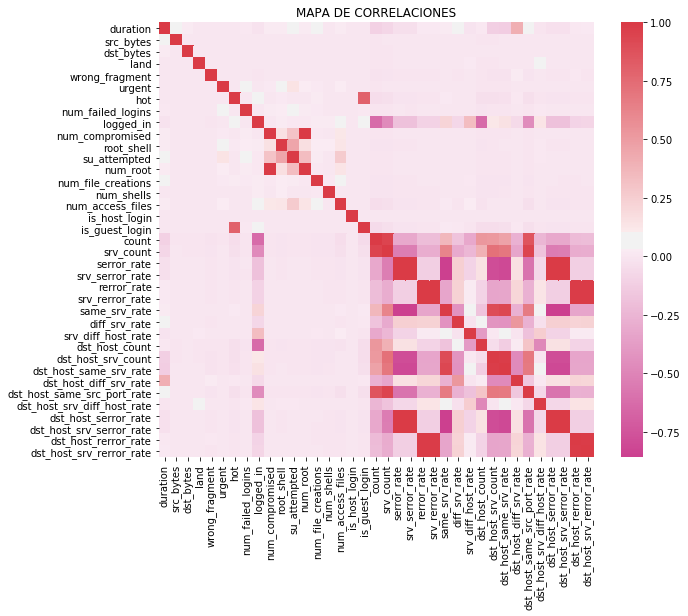

In [53]:
# Grafico de correlaciones entre las variables
f,ax = plt.subplots(figsize=(10, 8)) 
corr = train.corr() 
sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(700, 10, as_cmap=True), square=True, ax=ax) 
plt.title("MAPA DE CORRELACIONES")

En este mapa de calor tenemos los datos numéricos, este tipo de gráficos es para datos numéricos, por ende no podemos ver la correlación con nuestro TARGET, o atributo objetivo(outcome), por tal razón debemos realizar una transformación más adelante de los datos categóricos para en entrenamiento de nuestro modelo.
Cabe resaltar que el mapa de calor es fuertemente correlacionado  en positivo cuando tiende a 1 y fuertemente correlacionado en negativo cuando tiende a -1.


In [66]:
corr = train.corr()
corr[['dst_host_srv_count']].sort_values(by = 'dst_host_srv_count',ascending = False)\
.style.background_gradient()

,dst_host_srv_count
dst_host_srv_count,1.000000
dst_host_same_srv_rate,0.978810
same_srv_rate,0.907453
srv_count,0.720172
dst_host_same_src_port_rate,0.683918
count,0.514301
logged_in,0.125835
srv_diff_host_rate,0.007446
num_access_files,0.000236
dst_bytes,-0.001099


 podemos observar el porcentaje de datos correlacionados con algunas columnas, en este caso con dst_host_srv_count, pero más adelante nos interesa ver la correlación con nuestra columna objetivo. 

In [30]:
from scipy.stats import norm, skew
#Obtenemos el mayor valor de skew
lista_col_num = [col for col in train.columns if train[col].dtype!='object']
lista_col_skew = train[lista_col_num].apply(lambda x: skew(x.dropna())).sort_values(ascending=False) 
tabla_skew = pd.DataFrame({'Skew' :lista_col_skew}) 
tabla_skew.head(10)

,Skew
is_host_login,1851.728382
dst_bytes,1512.857683
num_compromised,1387.663257
urgent,1358.115087
num_root,1327.343934
src_bytes,1088.036236
land,404.076725
num_failed_logins,337.096126
su_attempted,229.422716
num_file_creations,208.114568


Como vemos tenemos como mayor numero de outliers a is_host_login, seguido de num_compromised

## Distribucion de grafico de barras para variables categoricas

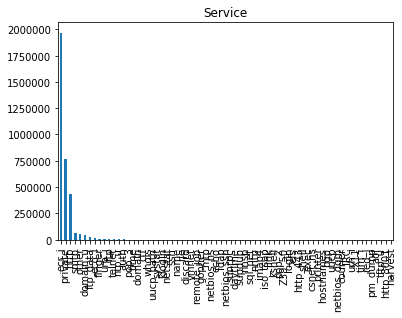

In [47]:
# Gráfico de barras de service
plot_service = train['service'].value_counts().plot(kind='bar',
                                            title='Service')

<Figure size 432x288 with 0 Axes>

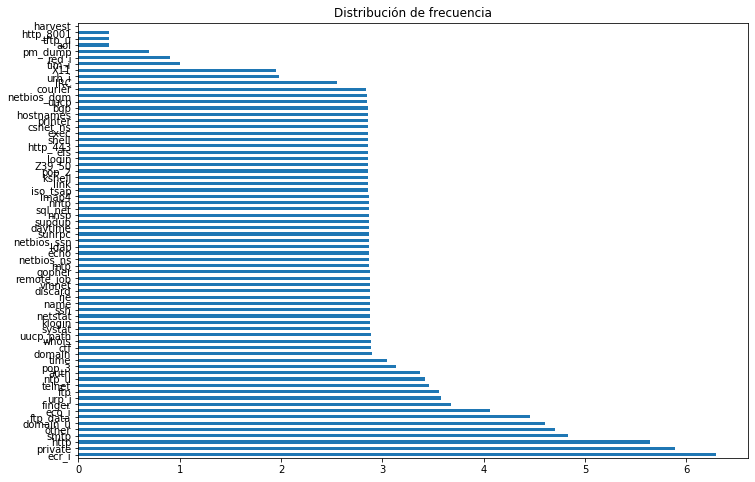

In [44]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.clf()
plt.figure(figsize=(12,8))
plt.title('Distribución de frecuencia')
train['service'].value_counts().apply(np.log10).plot(kind='barh')
plt.show()

Como vemos el grafico de distribucion de frecuencia y con una funcion logaritmica en potencia de 10 vemos que existe data desbalanceada. 

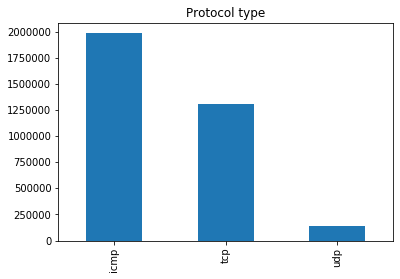

In [36]:
# Gráfico de barras de protocol_type
plot_protocol_type = train['protocol_type'].value_counts().plot(kind='bar',
                                            title='Protocol type')

De los graficos anteirores podemos ver que el protcol_type mas usado es icmp siendo el menos usado udp

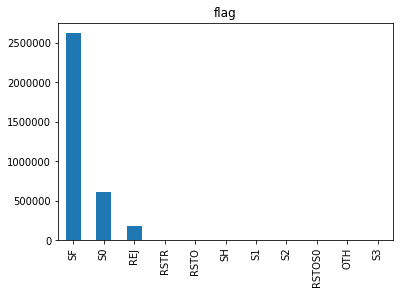

In [37]:
# Gráfico de barras de flag
plot_flag = train['flag'].value_counts().plot(kind='bar',
                                            title='flag')

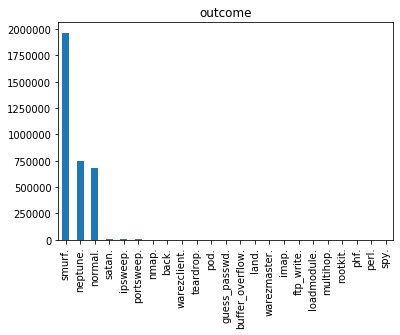

In [38]:
# Gráfico de barras de outcome
plot_outcome = train['outcome'].value_counts().plot(kind='bar',
                                            title='outcome')

In [34]:
train.to_csv("/Users/geraldine/Documents/IDS/DATASET/datatwo/new_data_train.csv")

In [45]:
test.to_csv("/Users/geraldine/Documents/IDS/DATASET/datatwo/new_data_test.csv")